In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [9]:
fc24 = pd.read_csv("FC24_PLAYER_RATINGS2.csv")

In [3]:
fc24.head()

,Positioning,Rank,Player Name,OVR,PAC,SHO,PAS,DRİ,DEF,PHY,Position,Acceleration,Sprint Speed,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Shot Passing,Long Passing,Curve,Agility,Balance,Reactions,Ball Control,Detailed Dribbling,Composure,Interception,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Age.1,Foot,Height,League,Nation,Team,Weight
0,93,1,Kylian Mbappé,91,97,90,80,92,36,78,ST,97,97,94,90,83,84,84,83,78,69,86,71,80,93,82,93,92,93,88,38,73,26,34,32,88,88,77,64,24,High,Low,24,Right,18,Ligue 1 Uber Eats,France,Paris SG,75
1,91,2,Alexia Putellas,91,82,90,91,92,72,78,CM,81,82,91,86,89,90,91,91,88,89,94,91,89,90,89,92,94,92,92,78,74,60,81,64,84,85,78,70,29,High,Medium,29,Left,17,Liga F,Spain,FC Barcelona,67
2,96,3,Erling Haaland,91,89,93,66,80,45,88,ST,82,94,96,94,86,90,84,74,47,62,77,53,77,76,72,94,82,79,87,43,83,38,47,29,93,76,93,87,23,High,Medium,23,Left,19,Premier League,Norway,Manchester City,94
3,88,4,Kevin De Bruyne,91,72,88,94,87,65,78,CM,72,72,85,92,92,83,83,95,95,83,94,94,92,74,78,92,92,86,88,66,55,66,70,53,72,88,74,75,32,High,Medium,32,Right,18,Premier League,Belgium,Manchester City,75
4,91,5,Aitana Bonmatí,90,81,84,83,91,75,73,CM,82,80,91,69,89,62,70,90,67,67,91,87,76,93,86,91,91,91,85,88,54,70,81,67,75,80,75,60,25,High,High,25,Right,16,Liga F,Spain,FC Barcelona,51


In [10]:
dropped_columns = ["Rank","Player Name", "PAC","SHO","PAS","DRİ","DEF","PHY","Age.1","Height","League","Nation","Team","Weight"]
fc24.drop(dropped_columns,inplace=True,axis=1)

In [5]:
#Bilgilendirme:
"""
CAM (Central Attacking Midfielder (Merkez Ofansif Orta Saha)) 
CB (Center Back (Stoper))
CDM (Central Defensive Midfielder (Merkez Defansif Orta Saha)
CF(Center Forward (Forvet) - Santrafor) 
CM (Central Midfielder (Merkez Orta Saha)) 
GK (Goalkeeper (Kaleci))
LB ( Left Back (Sol Bek))
LM ( Left Midfielder (Sol Orta Saha))
LW (Left Winger (Sol Kanat)) 
LWB (Left Wing Back (Sol Kanat Bek)) 
RB (Right Back (Sağ Bek))
RM (Right Midfielder (Sağ Orta Saha)) 
RW (Right Winger (Sağ Kanat))
RWB (Right Wing Back (Sağ Kanat Bek))
ST (Striker (Forvet))
----------------------------------------
Oyuncu Rolleri Temelinde Kategorizasyon:

Hücumcu: CF, ST, LW, RW
Orta Saha Oyuncusu: CAM, CDM, CM, LM, RM
Defans Oyuncusu: CB, LB, RB, LWB, RWB
Kaleci: GK

"""

'\nCAM (Central Attacking Midfielder (Merkez Ofansif Orta Saha)) \nCB (Center Back (Stoper))\nCDM (Central Defensive Midfielder (Merkez Defansif Orta Saha)\nCF(Center Forward (Forvet) - Santrafor) \nCM (Central Midfielder (Merkez Orta Saha)) \nGK (Goalkeeper (Kaleci))\nLB ( Left Back (Sol Bek))\nLM ( Left Midfielder (Sol Orta Saha))\nLW (Left Winger (Sol Kanat)) \nLWB (Left Wing Back (Sol Kanat Bek)) \nRB (Right Back (Sağ Bek))\nRM (Right Midfielder (Sağ Orta Saha)) \nRW (Right Winger (Sağ Kanat))\nRWB (Right Wing Back (Sağ Kanat Bek))\nST (Striker (Forvet))\n----------------------------------------\nOyuncu Rolleri Temelinde Kategorizasyon:\n\nHücumcu: CF, ST, LW, RW\nOrta Saha Oyuncusu: CAM, CDM, CM, LM, RM\nDefans Oyuncusu: CB, LB, RB, LWB, RWB\nKaleci: GK\n\n'

In [11]:
# Pozisyonları kategorilere eşleştirmek için bir sözlük oluşturalım
pozisyon_kategori = {
    'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],
    'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],
    'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],
    'Kale': ['GK']
}

# Yeni bir 'Kategori' sütunu ekleyerek kategorileri atayalım
fc24['Kategori'] = fc24['Position'].apply(lambda x: next((kategori for kategori, pozisyonlar in pozisyon_kategori.items() if x in pozisyonlar), None))
fc24.drop(["Position"],axis=1 , inplace=True)
fc24.head()

,Positioning,OVR,Acceleration,Sprint Speed,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Shot Passing,Long Passing,Curve,Agility,Balance,Reactions,Ball Control,Detailed Dribbling,Composure,Interception,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Foot,Kategori
0,93,91,97,97,94,90,83,84,84,83,78,69,86,71,80,93,82,93,92,93,88,38,73,26,34,32,88,88,77,64,24,High,Low,Right,Hücum Hattı
1,91,91,81,82,91,86,89,90,91,91,88,89,94,91,89,90,89,92,94,92,92,78,74,60,81,64,84,85,78,70,29,High,Medium,Left,Orta Saha
2,96,91,82,94,96,94,86,90,84,74,47,62,77,53,77,76,72,94,82,79,87,43,83,38,47,29,93,76,93,87,23,High,Medium,Left,Hücum Hattı
3,88,91,72,72,85,92,92,83,83,95,95,83,94,94,92,74,78,92,92,86,88,66,55,66,70,53,72,88,74,75,32,High,Medium,Right,Orta Saha
4,91,90,82,80,91,69,89,62,70,90,67,67,91,87,76,93,86,91,91,91,85,88,54,70,81,67,75,80,75,60,25,High,High,Right,Orta Saha


In [13]:
priority_order = ['Low','Medium','High']


def custom_label_encoding(value):
    return priority_order.index(value)


fc24['Att_Work_Rate'] = fc24['Att_Work_Rate'].apply(lambda x: custom_label_encoding(x) if x in priority_order else x)


fc24['Att_Work_Rate'].head(10)

0    2
1    2
2    2
3    2
4    2
5    0
6    2
7    1
8    1
9    2
Name: Att_Work_Rate, dtype: int64

In [14]:
priority_order = ['Low','Medium','High']

def custom_label_encoding(value):
    return priority_order.index(value)

fc24['Def_Work_Rate'] = fc24['Def_Work_Rate'].apply(lambda x: custom_label_encoding(x) if x in priority_order else x)

fc24['Def_Work_Rate'].head()

0    0
1    1
2    1
3    1
4    2
Name: Def_Work_Rate, dtype: int64

In [15]:
label_encoder = LabelEncoder()
fc24['Kategori'] = label_encoder.fit_transform(fc24["Kategori"])
fc24["Kategori"].head(10)

#Bilgilendirme:
"""
Pozisyon Kategori'lerinin Encoding Karşılığı

'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],     = 0
'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],        = 1
'Kale': ['GK']                                  = 2
'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],  = 3

"""

"\nPozisyon Kategori'lerinin Encoding Karşılığı\n\n'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],     = 0\n'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],        = 1\n'Kale': ['GK']                                  = 2\n'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],  = 3\n\n"

In [16]:
label_encoder = LabelEncoder()
fc24['Foot'] = label_encoder.fit_transform(fc24["Foot"])
fc24["Foot"].head()

0    1
1    0
2    0
3    1
4    1
Name: Foot, dtype: int32

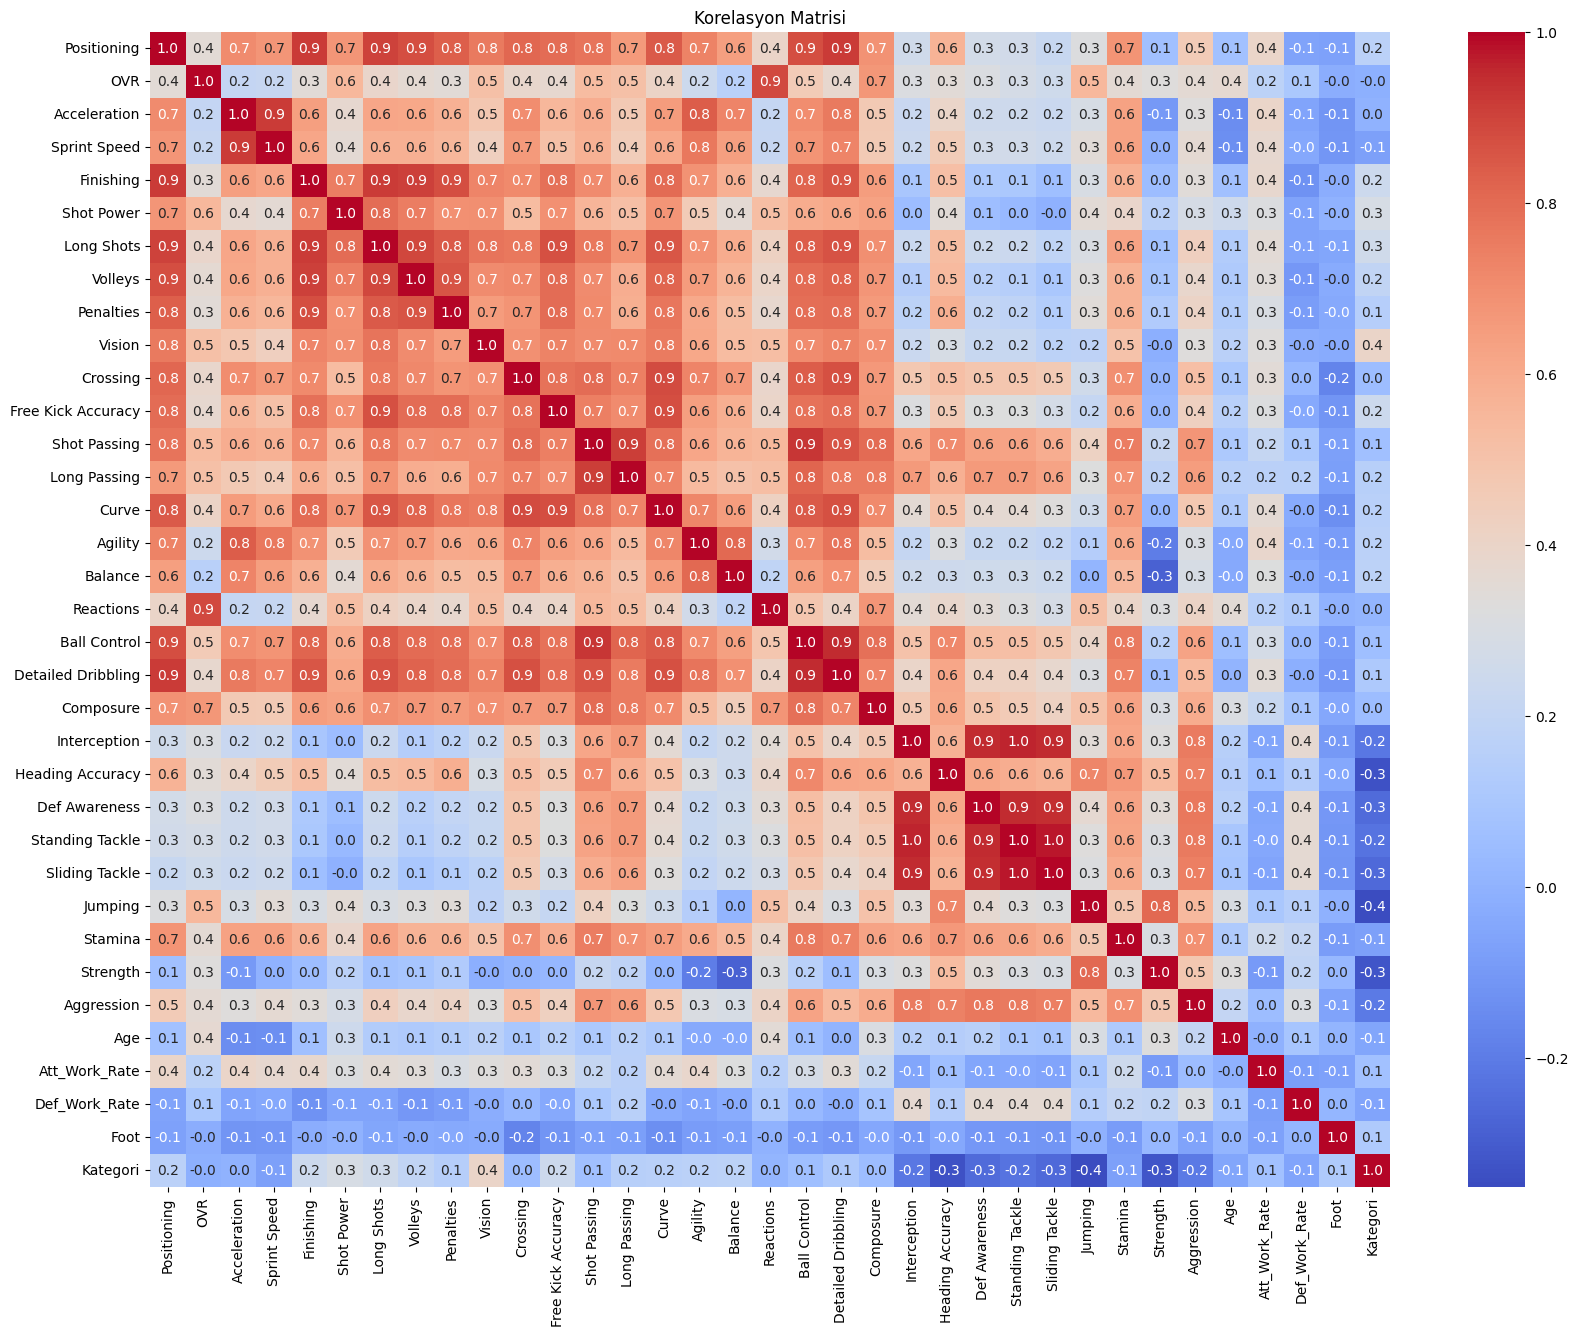

In [25]:
correlation_matrix = fc24.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Korelasyon Matrisi')
plt.show()

In [27]:
X = fc24.drop(["Kategori"],axis=1)
y = fc24["Kategori"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# LazyClassifier'ı kullanarak modelleri eğitin
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Modelleri ve tahmin sonuçlarını yazdırın
print(models)

 97%|█████████▋| 28/29 [06:50<00:05,  5.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 13860, number of used features: 34
[LightGBM] [Info] Start training from score -1.080169
[LightGBM] [Info] Start training from score -1.676963
[LightGBM] [Info] Start training from score -2.183040
[LightGBM] [Info] Start training from score -1.019369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [06:53<00:00, 14.26s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  Time Taken
Model                                                                                   
LogisticRegression                 0.89               0.90    None      0.89        3.09
XGBClassifier                      0.89               0.89    None      0.89        2.79
SVC                                0.89               0.89    None      0.89       15.52
LinearDiscriminantAnalysis         0.88               0.89    None      0.88        0.99
LGBMClassifier                     0.88               0.89    None      0.88        2.89
RandomForestClassifier             0.88               0.89    None      0.88       36.65
CalibratedClassifierCV             0.88               0.89    None      0.88       10.61
LinearSVC                          0.88               0.89    None      0.88       25.12
SGDClassifier                      0.88               0.89    None      0.88        1.06
ExtraTreesClassifier 

In [31]:
from sklearn.preprocessing import StandardScaler


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [34]:
vif_data

,Variable,VIF
0,Positioning,101.10
1,OVR,478.32
2,Acceleration,222.89
3,Sprint Speed,141.65
4,Finishing,99.21
5,Shot Power,103.10
6,Long Shots,95.96
7,Volleys,53.26
8,Penalties,61.37
9,Vision,84.95


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X.drop(["OVR"],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:

# L1 (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_l1.fit(X_train_scaled, y_train)

# L2 (Ridge)
model_l2 = LogisticRegression(penalty='l2', random_state=42)
model_l2.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [45]:
y_pred_l1 = model_l1.predict(X_test_scaled)
y_pred_l2 = model_l2.predict(X_test_scaled)


accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)


In [46]:
print("L1 Regularization Accuracy:", accuracy_l1)
print("L2 Regularization Accuracy:", accuracy_l2)

L1 Regularization Accuracy: 0.8799769186381996
L2 Regularization Accuracy: 0.8834391229082516


In [65]:
# 'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],     = 0
# 'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],        = 1
# 'Kale': ['GK']                                  = 2
# 'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],  = 3

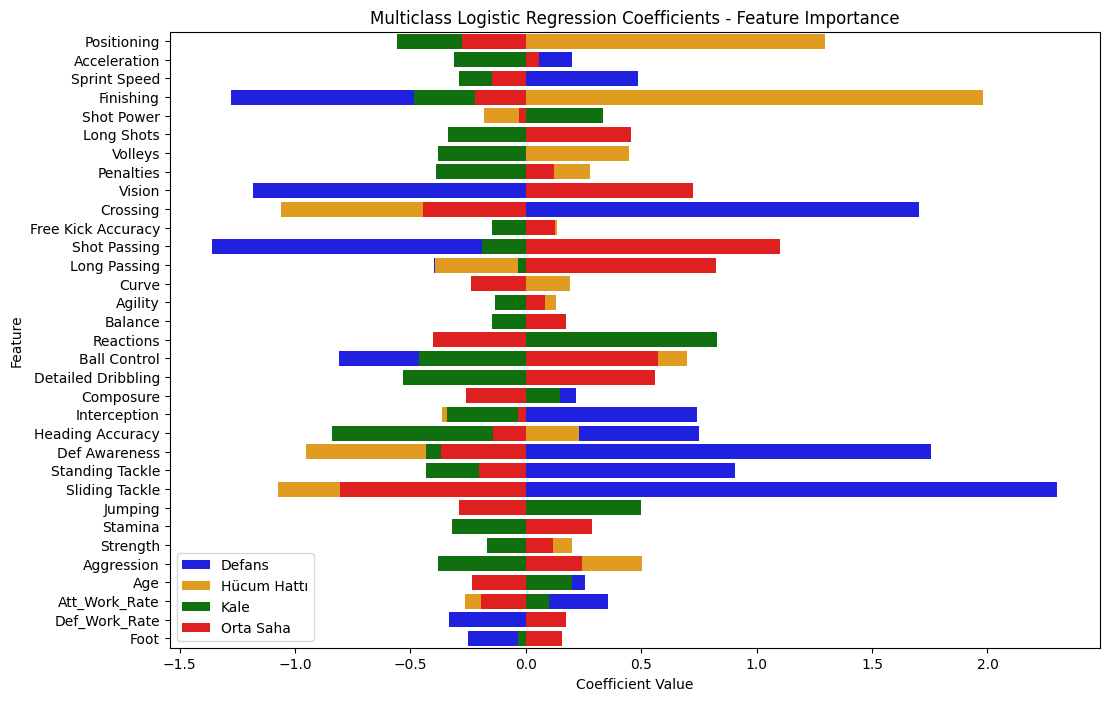

In [57]:
# Özellik katsayılarına ve isimlerine erişim
coefficients = model_l2.coef_
feature_names = X_train.columns

# Katsayıları ve özellik isimlerini bir DataFrame'e yerleştir
importances_df = pd.DataFrame({'Feature': feature_names, 'Defans': coefficients[0], 'Hücum Hattı': coefficients[1], 'Kale': coefficients[2], 'Orta Saha' : coefficients[3]})

# Grafikle göster
plt.figure(figsize=(12, 8))
sns.barplot(x='Defans', y='Feature', data=importances_df, color='blue', label='Defans')
sns.barplot(x='Hücum Hattı', y='Feature', data=importances_df, color='orange', label='Hücum Hattı')
sns.barplot(x='Kale', y='Feature', data=importances_df, color='green', label='Kale')
sns.barplot(x='Orta Saha', y='Feature', data=importances_df, color='red', label='Orta Saha')
plt.title('Multiclass Logistic Regression Coefficients - Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()
plt.show()

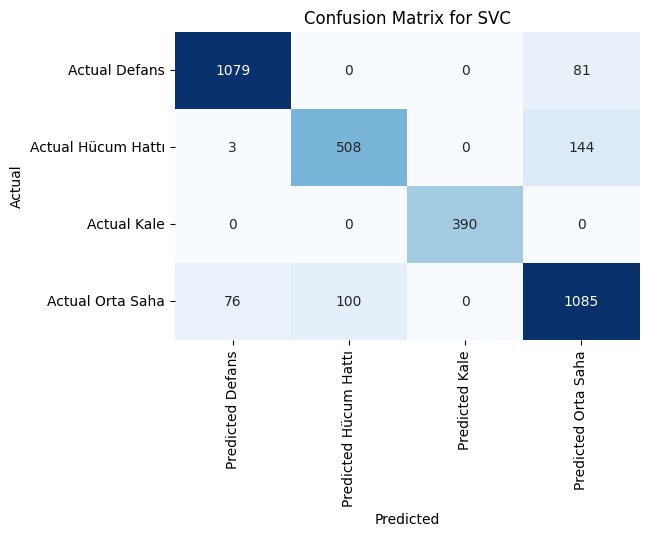

In [66]:


cm_l2 = confusion_matrix(y_test, y_pred_l2)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_l2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Defans", "Predicted Hücum Hattı", "Predicted Kale", "Predicted Orta Saha"],
            yticklabels=["Actual Defans", "Actual Hücum Hattı", "Actual Kale", "Actual Orta Saha"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVC")
plt.show()


In [48]:
# Sınıf isimleri
class_names = ['Defans', 'Hücum Hattı', 'Kale', 'Orta Saha']

# Classification report'u oluştururken target_names parametresini kullanma
classification_rep_svc = classification_report(y_test, y_pred_l2, target_names=class_names)

# Model performans metrikleri
accuracy_svc = accuracy_score(y_test, y_pred_l2)
precision_svc= precision_score(y_test, y_pred_l2, average='micro')
recall_svc = recall_score(y_test, y_pred_l2, average='micro')
f1_svc= f1_score(y_test, y_pred_l2, average='micro')

model_name_l2 = "Logistic Regression (L2 Ridge) Model"
print(f'Model Name: {model_name_l2}')
print(f'Model Accuracy: {accuracy_svc}')
print(f'Precision: {precision_svc}')
print(f'Recall: {recall_svc}')
print(f'F1 Score: {f1_svc}')

# Sınıflandırma raporu
print("\nClassification Report:")
print(classification_rep_svc)

Model Name: Logistic Regression (L2 Ridge) Model
Model Accuracy: 0.8834391229082516
Precision: 0.8834391229082516
Recall: 0.8834391229082516
F1 Score: 0.8834391229082516

Classification Report:
              precision    recall  f1-score   support

      Defans       0.93      0.93      0.93      1160
 Hücum Hattı       0.84      0.78      0.80       655
        Kale       1.00      1.00      1.00       390
   Orta Saha       0.83      0.86      0.84      1261

    accuracy                           0.88      3466
   macro avg       0.90      0.89      0.89      3466
weighted avg       0.88      0.88      0.88      3466



In [84]:
from google.cloud import bigquery


In [85]:
from google.cloud import bigquery

# Google Cloud Platform'da oluşturduğunuz bir hizmet hesabının kimlik bilgileri (JSON dosyası)
service_account_json_path = 'swift-terra-405619-f5f3188f542f.json'

# BigQuery istemcisini oluşturun
client = bigquery.Client.from_service_account_json(service_account_json_path)

In [87]:

# Çekmek istediğiniz SQL sorgusunu oluşturun
query = """
select * from `swift-terra-405619.FC24_PLAYER_RATINGS2`
LIMIT 10
"""


In [67]:
import shap


  0%|          | 0/100 [00:00<?, ?it/s]

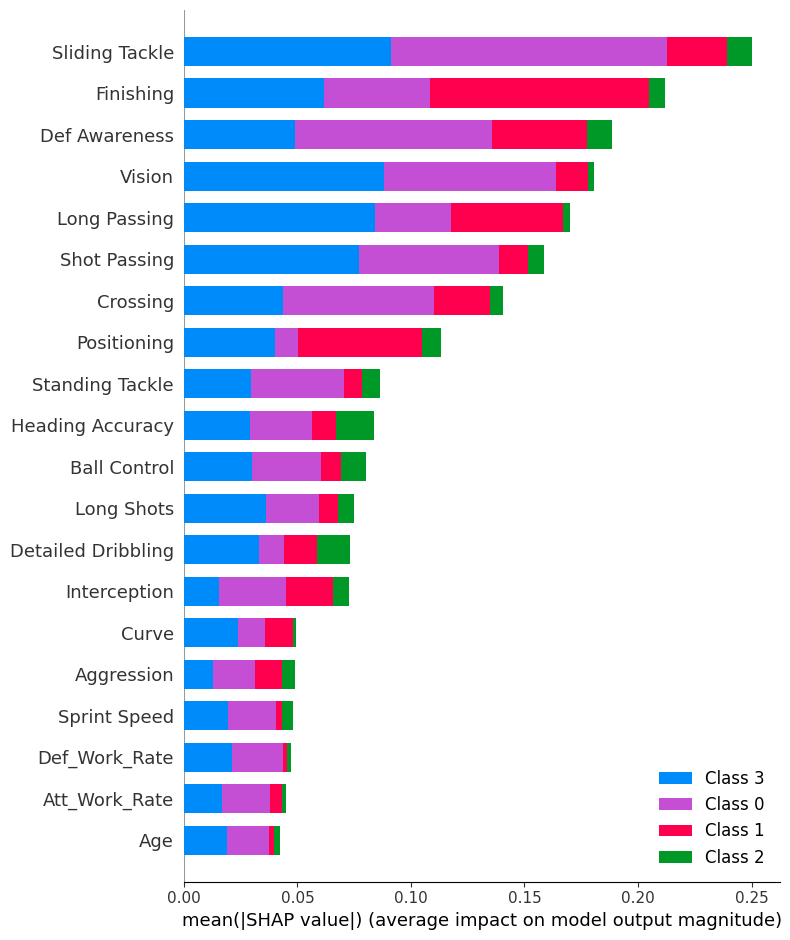

In [74]:
# Assuming model_l2 is a trained Logistic Regression model
explainer = shap.KernelExplainer(model_l2.predict_proba, X_train_scaled[:100, :])  # Adjust the sample size as needed

# Obtain SHAP values for the test set
shap_values_classification = explainer.shap_values(X_test_scaled[:100, :])  # Adjust the sample size as needed

# Summary plot
shap.summary_plot(shap_values_classification, X_test_scaled[:100, :], feature_names=X_test.columns)  # Adjust the sample size as needed